### The Sparks Foundation GRIP July 2021

# Task 1: Prediction using Unsupervised ML
#### By: Lekshmi Pillai

### Objective: From the given ‘Iris’ dataset, predict the optimum number of clusters
###                   and represent it visually.

Dataset url: http://bit.ly/w-data

##### Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

##### Loading the Dataset

In [3]:
iris = pd.read_csv("Iris.csv")

##### Exploring and understanding the Dataset

In [5]:
iris.head(5)  #shows us the first 5 rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.shape #shows us the dimension of the data frame

(150, 6)

The dataset has 150 rows and 6 columns

In [10]:
iris.describe() #describe the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.info() # knowing about data type of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
iris.isnull().sum() #checking for null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no NULL values in the Dataset.
We now need to remove two columns- 'Id' and 'Species' because they are not required in our clustering process

In [18]:
iris.drop(columns=["Id","Species"],axis=1,inplace=True) #dropping two columns
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
# scaling the dataset usin MinMaxScaler
mms = MinMaxScaler()
mms.fit(iris)
iris_scaled = mms.transform(iris)
iris_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

MinMaxScaler scales the value and converts it into a range [0,1]. This is helful to remove the bias that would have been created due to different ways of collecting data.

In [24]:
# Converting scaled data into Dataframe
iris_data = pd.DataFrame(iris_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


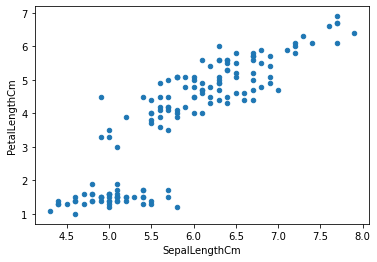

In [25]:
# plotting a scatterplot of Sepal length and Petal length
iris.plot(kind='scatter', x='SepalLengthCm',y='PetalLengthCm')
plt.show()

#### K-Means Clustering

We use the Elbow Method to find the optimum number of clusters. In the elbow method, K-Means clustering method is run on
different values of k and optimum value can then be decided based on its graph.

In [28]:
list=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(iris) # training a model to create classifier
    list.append(kmeans.inertia_)
list

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.93873974358975,
 34.190687924796634,
 29.90537429982511,
 27.927882157034986]

Text(0.5, 1.0, 'Elbow method to find optimal value of k')

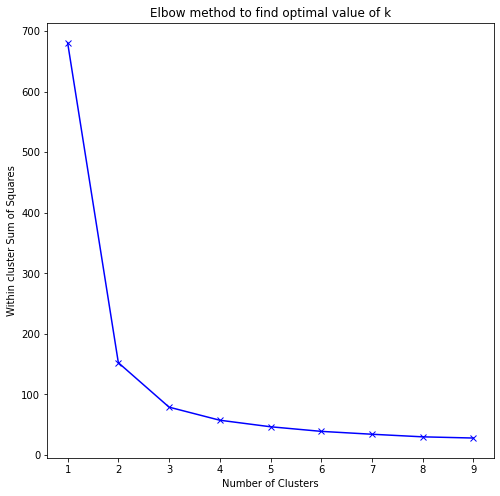

In [30]:
plt.figure(figsize=(8,8))
plt.plot(range(1,10),list,'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Within cluster Sum of Squares")
plt.title("Elbow method to find optimal value of k")

The optimal value of k according to the plot is k=3 since the elbow occurs at 3.

In [33]:
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=0)
#training data, creating classifier and predicting the model
k_means = kmeans.fit_predict(iris)
k_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

The values of 0, 1 and 2 represent the three species namely setosa, versicolor and virginica

In [34]:
#centroids of the clusters formed
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

#### Viasualization of the Clusters

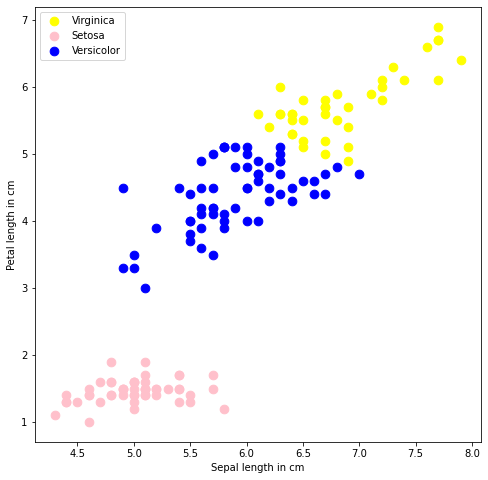

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(iris.iloc[k_means==0,0],iris.iloc[k_means == 0,2], s=75, c='yellow', label = 'Virginica')
plt.scatter(iris.iloc[k_means==1,0],iris.iloc[k_means == 1,2], s=75, c='pink', label = 'Setosa')
plt.scatter(iris.iloc[k_means==2,0],iris.iloc[k_means == 2,2], s=75, c='blue', label = 'Versicolor')
plt.legend()
plt.xlabel('Sepal length in cm')
plt.ylabel('Petal length in cm')
plt.show()

#### Thus we classify the dataset into three clusters and conclude that 
#### Setosa species have smaller sepal and petal length and virginica sepcies have larger sepal and petal length